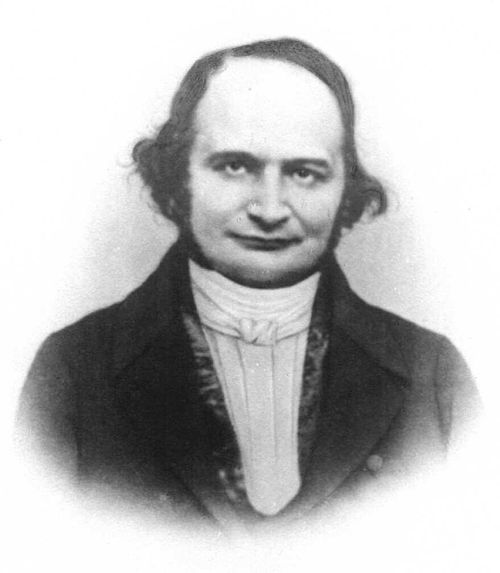
# Carl Gustav Jacob Jacobi

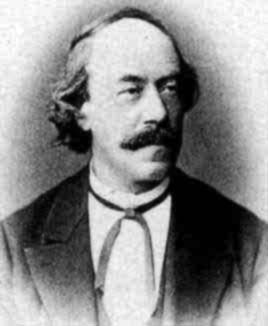
# Rudolph Lipschitz

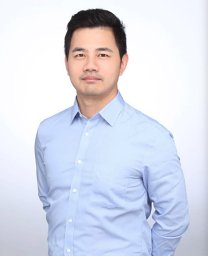
# Xianbiao Qi

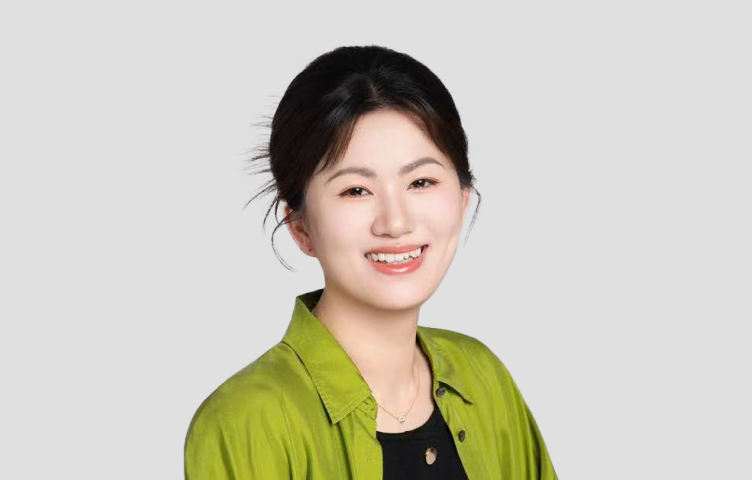
#  Jianan Wang

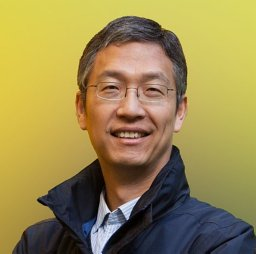
# Lei Zhang

# Understanding Optimization of Deep Learning via Jacobian Matrix and Lipschitz Constant  
**Xianbiao Qi et al. (arXiv:2306.09338v3)**

# https://arxiv.org/abs/2306.09338

---

## Abstract

This paper presents a unified theoretical framework for understanding deep learning optimization through **Jacobian matrices** and **Lipschitz constants**. Gradient vanishing and exploding are interpreted as consequences of Jacobian composition across layers. The framework explains how architectural design, normalization, initialization, and optimizers influence training stability and representational capacity. Rather than proposing new algorithms, the paper systematizes existing optimization techniques into **explicit** and **implicit** categories and supports the theory with analytical experiments.

---

## Problems

1. **Gradient Vanishing**  
   Gradients decay exponentially across deep networks, preventing effective learning in early layers and limiting representational power.

2. **Gradient Exploding**  
   Gradients grow uncontrollably, leading to unstable training and divergence.

3. **Lack of Theoretical Unification**  
   Existing optimization techniques lack a shared mathematical explanation.

4. **Transformer Optimization Difficulty**  
   Heterogeneous components such as self-attention and feed-forward networks exhibit complex Jacobian behavior compared to homogeneous CNNs.

---

## Proposed Solutions

1. **Jacobian-Centric Analysis**  
   Model optimization dynamics as compositions of layer-wise Jacobians.

2. **Lipschitz Constant Control**  
   Use Lipschitz bounds to characterize training stability and sensitivity.

3. **Explicit Optimization**  
   Direct manipulation of parameters, gradients, learning rates, and weight decay.

4. **Implicit Optimization**  
   Architectural and structural choices—residual connections, normalization, attention mechanisms, and activation functions—that reshape the optimization landscape.

---

## Purpose

The objective is to provide a principled understanding of deep learning optimization by linking **gradient behavior**, **training stability**, and **representational capacity** to Jacobian matrices and Lipschitz constants, thereby guiding robust model and training design.

---

## Methodology

### Theoretical Analysis

- Formal definitions of Lipschitz continuity, gradient smoothness, and Hessian continuity.
- Derivation of Jacobian matrices and Lipschitz constants for core components:
  - Linear and convolutional layers
  - Normalization layers
  - Residual connections
  - Activation functions
  - Feed-forward networks
  - Self-attention mechanisms

### Categorization Framework

- Explicit vs. implicit optimization mechanisms.

### Analytical Experiments

- Empirical validation using simulated Lipschitz constants.
- Eigenvalue analysis of Jacobians.
- Sensitivity studies across architectures and norm choices.

---

## Results

- **Residual Connections**  
  Reduce gradient vanishing and smooth the optimization landscape.

- **Normalization**  
  Stabilizes forward propagation but may introduce large Lipschitz constants, particularly in attention-heavy models.

- **Attention Mechanisms**  
  Dot-product attention exhibits high Lipschitz constants, increasing the risk of instability.

- **Optimizers**  
  - **Adam** shows robustness to Lipschitz scaling due to normalized updates.  
  - **SGD** is highly sensitive to Lipschitz constants.  
  - **AdamW** improves stability through decoupled weight decay.

- **Initialization**  
  Lipschitz-aware initialization becomes critical as model scale increases.

- **Training Instability Indicator**  
  Sudden growth in dominant Jacobian eigenvalues correlates strongly with unstable training.

---

## Conclusions

The paper establishes **Jacobian matrices** and **Lipschitz constants** as fundamental tools for analyzing and diagnosing deep learning optimization. It explains why certain architectures, particularly Transformers, are harder to optimize and clarifies the roles of normalization, residual connections, optimizers, and regularization. By unifying diverse optimization techniques under a common mathematical framework, the work provides actionable guidance for designing stable, scalable, and high-performing deep learning models, while highlighting open theoretical challenges for future research.


# Mathematical Framework of Optimization via Jacobian and Lipschitz Analysis  
*Based on “Understanding Optimization of Deep Learning via Jacobian Matrix and Lipschitz Constant” (arXiv:2306.09338v3)*

---

## 1. Lipschitz Continuity (Core Mathematical Framework)

### Function-Level Lipschitz Continuity

A function  
$$
f:\mathbb{R}^D \rightarrow \mathbb{R}^{D'}
$$
is **Lipschitz continuous** if there exists a constant $$K_0 > 0$$ such that
$$
\|f(x_1) - f(x_2)\| \le K_0 \|x_1 - x_2\|, \quad \forall x_1, x_2 .
$$

#### Role in the Paper

- $$K_0$$ bounds the sensitivity of the network output to input perturbations.
- Large $$K_0$$ implies unstable training and exploding gradients.
- Small $$K_0$$ implies contraction and stable optimization.

---

### Local Lipschitz Continuity

For small perturbations $$\varepsilon$$:
$$
\|f(x + \varepsilon) - f(x)\| \le K_0 \|\varepsilon\|.
$$

#### Role

- Describes local curvature of the loss surface.
- Used to analyze stability around a specific training point.

---

### Gradient-Based Characterization

If $$f$$ is differentiable:
$$
\|\nabla f(x)\| \le K_0 \quad \Longleftrightarrow \quad f \text{ is Lipschitz}.
$$

#### Role

- Directly links Lipschitz constants to Jacobian norms.
- Justifies layer-wise Jacobian analysis.

---

## 2. Lipschitz Gradient and Hessian (Smoothness)

### Lipschitz Gradient (Smoothness)

$$
\|\nabla f(x_1) - \nabla f(x_2)\| \le K_1 \|x_1 - x_2\|.
$$

Equivalent condition:
$$
\|\nabla^2 f(x)\| \le K_1.
$$

#### Role

- Measures how fast gradients change.
- Critical for convergence guarantees of gradient descent.
- Large $$K_1$$ implies sharp loss landscapes and unstable optimization.

---

### Lipschitz Hessian

$$
\|\nabla^2 f(x_1) - \nabla^2 f(x_2)\| \le K_2 \|x_1 - x_2\|.
$$

#### Role

- Controls third-order behavior.
- Explains difficulty of second-order optimization in deep networks.
- Primarily theoretical; highlights limits of smoothness assumptions.

---

## 3. Jacobian Matrix (Central Analytical Object)

### Definition

For a vector-valued function
$$
y = f(x),
$$
the Jacobian is
$$
J_f(x) = \frac{\partial y}{\partial x}.
$$

---

### Chain Rule for Deep Networks

For a deep composition
$$
o = f_L \circ f_{L-1} \circ \cdots \circ f_1(x),
$$
the Jacobian is
$$
J_o(x) = \prod_{l=1}^{L} J_{f_l}(x).
$$

#### Role

- Gradient vanishing/exploding arises from repeated Jacobian multiplication.
- Eigenvalues $$< 1$$ lead to vanishing gradients.
- Eigenvalues $$> 1$$ lead to exploding gradients.

---

## 4. Linear Layers and Convolution (Homogeneous Operators)

### Linear Layer

$$
y = Wx + b,
$$
with Jacobian
$$
J = W^\top.
$$

The Lipschitz constant is
$$
K = \sigma_{\max}(W),
$$
where $$\sigma_{\max}$$ is the largest singular value.

#### Role

- Training stability depends on $$\sigma_{\max}(W)$$.
- Weight decay and initialization directly control this value.

---

### Convolution

Convolution can be written as a linear operator:
$$
y = W_{\text{conv}} x.
$$

#### Role

- Identical Jacobian and Lipschitz behavior to linear layers.
- Explains why CNNs are generally easier to optimize than Transformers.

---

## 5. Normalization (Jacobian Rescaling)

### Batch Normalization / Layer Normalization

General form:
$$
z = \frac{x - \mu}{\sqrt{\sigma^2 + \varepsilon}}, \qquad y = \gamma z + \beta.
$$

#### Jacobian Properties

- Dynamically rescales gradients.
- Depends on batch statistics or feature norms.

#### Role

- Enforces forward stability.
- Small $$\varepsilon$$ can induce very large Lipschitz constants, destabilizing backpropagation.

---

## 6. Self-Attention (High-Order Nonlinearity)

### Dot-Product Attention

$$
\text{Attn}(X) = V \cdot \text{softmax}\!\left(\frac{Q^\top K}{\sqrt{D}}\right).
$$

#### Mathematical Characteristics

- Nonlinear in both inputs and parameters.
- Jacobian depends on softmax and pairwise token interactions.

#### Role

- Produces large Lipschitz constants.
- Explains optimization difficulty in Transformers.

---

## 7. Residual Connections (Identity Jacobian)

### Definition

$$
y = x + f(x).
$$

Jacobian:
$$
J = I + J_f(x).
$$

#### Role

- Eigenvalues remain close to 1.
- Prevents gradient vanishing.
- Smooths the optimization landscape.

---

## 8. Activation Functions

### ReLU

$$
y = \max(0, x),
$$
with Jacobian
$$
J = \operatorname{diag}(\mathbf{1}_{x>0}).
$$

#### Role

- Piecewise linear with Lipschitz constant 1.
- Avoids saturation seen in sigmoid and tanh.
- Non-smoothness raises open convergence questions.

---

## 9. Feed-Forward Networks (FFN)

### Definition

$$
\text{FFN}(x) = W_2 \, \text{ReLU}(W_1 x + b_1) + b_2.
$$

Jacobian:
$$
J = W_1^\top \, \operatorname{diag}(\mathbf{1}_{W_1 x > 0}) \, W_2^\top.
$$

#### Role

- Can amplify Lipschitz constants due to width expansion.
- Commonly stabilized using residual connections.

---

## 10. Optimization Objective (Statistical Learning)

### Empirical Risk Minimization

$$
\min_W \; \frac{1}{N} \sum_{i=1}^{N} \mathcal{L}\big(y_i, f(x_i; W)\big)
+ \lambda \sum_l \|W_l\|_2^2.
$$

#### Role

- Standard supervised learning objective.
- Weight decay directly reduces Lipschitz constants.

---

## 11. Explicit Optimization (Parameter Dynamics)

### SGD Update

$$
W_{t+1} = W_t - \alpha \nabla_W \mathcal{L} - \alpha \lambda W_t.
$$

### Adam Update (Conceptual Form)

$$
\mu_t = \frac{m_t}{\sqrt{v_t} + \epsilon}.
$$

#### Role

- Adam normalizes gradient magnitude, increasing robustness to Lipschitz variation.
- SGD is directly affected by Jacobian scaling.

---

## 12. Spectral Analysis (Eigenvalues)

### Observation

Sudden spikes in dominant eigenvalues of weight matrices correlate with training instability.

#### Role

- Eigenvalues diagnose exploding gradients.
- Empirically links Jacobian theory to practice.

---

## 13. Mixed Precision Arithmetic (Numerical Stability)

### FP16 Limit

$$
\text{min positive} \approx 6 \times 10^{-5}.
$$

#### Role

- Motivates FP32 master weights.
- Prevents numerical underflow in small gradient updates.

---

## 14. Statistical Experiments (Analytical, Not Benchmarking)

### Methods

- Simulated Lipschitz constants  
- Sensitivity analysis under different norms  
- Eigenvalue tracking  

#### Role

- Validates theoretical claims.
- No hypothesis testing or confidence intervals.
- Entirely diagnostic and analytical.

---

## Final Mathematical Insight

Deep learning optimization is fundamentally the problem of controlling **Jacobian compositions** and **Lipschitz constants**.

Every architectural or algorithmic choice induces either:

- **Contraction**: stability, slower learning  
- **Expansion**: instability, fast divergence  

This perspective unifies vanishing gradients, exploding gradients, optimizer behavior, and architectural design within a single coherent mathematical framework.


## Research Gaps, Limitations, and Proposed Solutions

| **Problem / Research Gap** | **How This Limited Prior Work** | **How the Paper Addresses the Gap** |
|---|---|---|
| Lack of a unified theoretical explanation for gradient vanishing and exploding | Prior studies treated vanishing and exploding gradients as separate empirical issues, resulting in fragmented solutions without a shared mathematical basis | Introduces a unified framework showing that both phenomena arise from the composition of layer-wise Jacobian matrices |
| Insufficient mathematical characterization of training stability | Earlier work relied on heuristic practices (e.g., residual connections, normalization) without formal justification | Uses Lipschitz constants derived from Jacobian norms to rigorously characterize stability and instability |
| Limited understanding of how architectural modules affect optimization | Architectures were evaluated empirically with little theoretical insight into why certain modules are harder to optimize | Derives Jacobians and Lipschitz constants for core modules such as linear layers, normalization, attention, residuals, and FFNs |
| Absence of a clear distinction between optimization mechanisms | Optimization techniques were conflated, obscuring their distinct roles and interactions | Systematically categorizes optimization into **explicit** (optimizer-level) and **implicit** (architecture-level) mechanisms |
| Poor theoretical explanation for why Transformers are harder to optimize than CNNs | Explanations were mostly empirical, focusing on depth or scale rather than operator properties | Shows that Transformers are composed of heterogeneous, high-order nonlinear operators with large Lipschitz constants |
| Unclear role of normalization in backward stability | Normalization was widely adopted despite frequent instabilities in large-scale models | Demonstrates that normalization stabilizes forward propagation but can induce large backward Lipschitz constants |
| Limited theoretical insight into optimizer robustness | Choices such as SGD versus Adam were justified empirically without mathematical grounding | Explains optimizer behavior through sensitivity to Lipschitz constants, highlighting Adam’s robustness due to normalized updates |
| Lack of guidance for initialization in large-scale models | Initialization schemes were reused across scales without theoretical guarantees | Proposes Lipschitz-aware initialization guided by eigenvalue and spectral analysis |
| Weak diagnostic tools for detecting instability | Training failures were often detected only after divergence occurred | Links sudden growth in top eigenvalues and Lipschitz constants to imminent training instability |
| Disconnect between representational power and training stability | Expressiveness and stability were treated as competing or unrelated objectives | Shows that both are governed by Lipschitz constants, providing a shared mathematical control variable |

---

## Summary Insight

The paper closes a major theoretical gap by reframing deep learning optimization as a problem of **Jacobian composition** and **Lipschitz control**. Under this view, architectural design, optimizer behavior, initialization strategies, and training stability are unified within a single mathematical framework. Practices that were previously heuristic become principled, interpretable, and analyzable through the lens of Jacobian matrices and Lipschitz constants.


## Uses and Benefits in Deep Learning Optimization

| **Concept** | **Primary Uses in Optimization** | **Key Benefits for Deep Learning** |
|---|---|---|
| **Jacobian Matrix** | Models how small changes in inputs or parameters propagate through layers during forward and backward passes | Provides a precise mathematical explanation of gradient flow across deep networks |
|  | Analyzes gradient propagation via Jacobian composition in backpropagation | Explains gradient vanishing and exploding as eigenvalue effects of Jacobian products |
|  | Characterizes layer-wise sensitivity in both forward and backward directions | Enables identification of unstable layers or problematic modules |
|  | Compares architectural components through their Jacobian structure | Explains why residual connections stabilize training |
|  | Differentiates homogeneous (CNN, linear) vs. heterogeneous (attention-based) architectures | Clarifies why Transformers are harder to optimize than CNNs |
| **Lipschitz Constant** | Quantifies the maximum sensitivity of a network to input or parameter perturbations | Provides a scalar, interpretable measure of training stability |
|  | Bounds the norm of the Jacobian and gradients | Predicts exploding gradients when the constant is large |
|  | Measures contraction versus expansion behavior of layers | Explains vanishing gradients as excessive contraction |
|  | Guides architectural design (normalization, residuals, attention scaling) | Helps balance representational power and optimization stability |
|  | Informs optimizer behavior and robustness (e.g., Adam vs. SGD) | Explains why adaptive optimizers tolerate larger Lipschitz variation |
|  | Guides initialization, regularization, and weight decay strategies | Improves convergence reliability, especially in large-scale models |

---

## High-Level Insight

- **Jacobian matrices** explain *how* gradients propagate through deep networks.
- **Lipschitz constants** explain *how stable* that propagation is.

Together, they transform deep learning optimization from a largely heuristic practice into a **principled, analyzable, and diagnosable system** grounded in mathematical structure.


## Understanding Deep Learning Optimization Through Jacobian Matrices and Lipschitz Constants

---

## 1. View a Deep Network as a Composition of Functions

A deep neural network can be written as a composition of layer-wise functions:
$$
f(x) = f_L \circ f_{L-1} \circ \cdots \circ f_1(x).
$$

Optimization via backpropagation depends entirely on how information—specifically **gradients**—flows through this composition. The difficulty of training deep networks is therefore a consequence of how these functions interact mathematically.

---

## 2. Jacobian Matrix: How Gradients Propagate

### What the Jacobian Represents

For a layer $$f_l$$, the Jacobian matrix
$$
J_l = \frac{\partial f_l}{\partial x}
$$
measures how small changes in the layer input affect its output.

---

### Backpropagation as Jacobian Multiplication

During training, gradients propagate backward as:
$$
\frac{\partial \mathcal{L}}{\partial x_0}
=
J_1^\top J_2^\top \cdots J_L^\top
\frac{\partial \mathcal{L}}{\partial x_L}.
$$

#### Key Insight

Backpropagation is mathematically a **product of Jacobian matrices**.

---

## 3. Explaining Vanishing and Exploding Gradients

### Vanishing Gradients

If most layers satisfy
$$
\|J_l\| < 1,
$$
then repeated multiplication yields
$$
\|J_1 J_2 \cdots J_L\| \rightarrow 0.
$$

This leads to:
- Gradients in early layers becoming negligible  
- Failure of deep representations to learn  

---

### Exploding Gradients

If some layers satisfy
$$
\|J_l\| > 1,
$$
then gradient norms grow exponentially, causing:
- Numerical instability  
- Divergence during training  

---

## 4. Lipschitz Constant: Measuring Stability

### Definition

A function $$f$$ is Lipschitz continuous if
$$
\|f(x_1) - f(x_2)\| \le K \|x_1 - x_2\|,
$$
where $$K$$ is the **Lipschitz constant**.

---

### Connection to Jacobians

For differentiable networks:
$$
K \approx \sup_x \|J_f(x)\|.
$$

#### Interpretation

- Lipschitz constant is an upper bound on Jacobian norm  
- It directly controls sensitivity and training stability  

---

## 5. Network-Level Understanding

For a deep network composed of $$L$$ layers:
$$
K_{\text{network}} \le \prod_{l=1}^{L} K_l.
$$

This explains:
- Why deep networks amplify instability  
- Why large models are harder to train  
- Why controlling each layer’s behavior matters  

---

## 6. Understanding Architectural Design Through This Lens

### Residual Connections

$$
y = x + f(x)
\quad \Rightarrow \quad
J = I + J_f(x).
$$

Effects:
- Eigenvalues remain close to 1  
- Gradient vanishing is prevented  
- Optimization becomes smoother  

---

### Normalization

- Rescales activations and gradients  
- Stabilizes forward propagation  
- Can increase backward Lipschitz constants if poorly configured  

---

### Attention Mechanisms

- High-order nonlinear Jacobians  
- Large Lipschitz constants  
- Explains why Transformers are harder to optimize than CNNs  

---

## 7. Understanding Optimizers

### SGD

- Directly affected by Jacobian scaling  
- Highly sensitive to large Lipschitz constants  

---

### Adam / AdamW

- Normalize gradients internally  
- More robust to Lipschitz variation  
- Explains observed empirical stability  

---

## 8. Practical Optimization Principles Derived

From the Jacobian–Lipschitz perspective:

- Control Jacobian norms to stabilize gradients  
- Avoid excessive contraction to prevent vanishing gradients  
- Avoid excessive expansion to prevent exploding gradients  
- Use residual paths to keep eigenvalues near 1  
- Regularize weights to reduce Lipschitz constants  
- Choose optimizers that adapt to Lipschitz sensitivity  

---

## 9. Unified Interpretation

Deep learning optimization is fundamentally about **controlling Jacobian composition** and **bounding the resulting Lipschitz constant**.

- Jacobians explain **how gradients flow**  
- Lipschitz constants explain **how stable that flow is**  

Together, they unify architecture, optimization, and initialization under a single mathematical framework.

---

## One-Sentence Summary

Understanding optimization through Jacobian matrices and Lipschitz constants transforms deep learning training from a collection of heuristics into a principled analysis of gradient propagation and stability.


## Related Work in Deep Learning Optimization

| **Author(s)** | **Year** | **Title** | **Venue** | **Connection to This Paper** |
|---|---|---|---|---|
| Rumelhart, Hinton, Williams | 1986 | Learning representations by back-propagating errors | Nature | Introduced backpropagation, whose gradient dynamics are analyzed here via Jacobian composition |
| Bengio, Simard, Frasconi | 1994 | Learning long-term dependencies with gradient descent is difficult | IEEE TNN | Early formal identification of gradient vanishing, unified here using Jacobian theory |
| Glorot, Bengio | 2010 | Understanding the difficulty of training deep feedforward neural networks | AISTATS | Introduced Xavier initialization, reinterpreted through Lipschitz and spectral bounds |
| Pascanu, Mikolov, Bengio | 2013 | On the difficulty of training recurrent neural networks | ICML | Formalized gradient exploding and vanishing, extended here to general deep architectures |
| He et al. | 2016 | Deep residual learning for image recognition | CVPR | Residual shortcuts analyzed as identity-dominant Jacobians preventing vanishing gradients |
| Ioffe, Szegedy | 2015 | Batch Normalization: Accelerating deep network training | ICML | Normalization analyzed via Jacobian rescaling and its effect on Lipschitz constants |
| Ba, Kiros, Hinton | 2016 | Layer Normalization | arXiv | LayerNorm Jacobian and Lipschitz behavior formally examined |
| Vaswani et al. | 2017 | Attention Is All You Need | NeurIPS | Transformer attention studied as a high-order nonlinear operator with large Lipschitz constants |
| Simonyan, Zisserman | 2014 | Very deep convolutional networks for large-scale image recognition | ICLR | Serves as a contrast case: homogeneous operators easier to optimize than Transformers |
| Goodfellow et al. | 2016 | Deep Learning | MIT Press | Provides foundational optimization and gradient theory used throughout the paper |
| Bottou et al. | 2018 | Optimization methods for large-scale machine learning | SIAM Review | Classical optimization assumptions contrasted with deep learning’s non-smooth reality |
| Kingma, Ba | 2014 | Adam: A Method for Stochastic Optimization | ICLR | Adam’s robustness explained via normalization against Lipschitz variation |
| Loshchilov, Hutter | 2017 | Decoupled Weight Decay Regularization | ICLR | AdamW interpreted as Lipschitz-reducing regularization |
| Micikevicius et al. | 2017 | Mixed Precision Training | ICLR | Numerical stability discussed in relation to gradient scaling and underflow |
| Heinonen | 2005 | Lectures on Lipschitz Analysis | Springer | Mathematical foundation for Lipschitz continuity used as a core analytical tool |
| Nesterov | 2003 | Introductory Lectures on Convex Optimization | Springer | Smoothness and convergence assumptions contrasted with deep learning settings |
| Qi et al. | 2023 | LipsFormer | NeurIPS | Prior work by the authors on Lipschitz-controlled Transformers, extended and generalized here |

---

## Synthesis of the Related Work Landscape

Prior work has largely focused on identifying individual optimization pathologies—such as vanishing gradients, exploding gradients, or unstable training—or proposing engineering solutions including residual connections, normalization techniques, and adaptive optimizers.

The contribution of this paper is to unify these strands by demonstrating that:

- Gradient behavior is governed by **Jacobian matrix composition**.
- Training stability and representational capacity are controlled by **Lipschitz constants**.
- Architectural design and optimizer choice can be analyzed within a **single mathematical framework**.

This synthesis transforms a collection of empirical observations and heuristics into a coherent, principled theory of deep learning optimization.
